In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-detection-using-mri-images/Training/no_tumor/image(84).jpg
/kaggle/input/brain-tumor-detection-using-mri-images/Training/no_tumor/image(44).jpg
/kaggle/input/brain-tumor-detection-using-mri-images/Training/no_tumor/image(245).jpg
/kaggle/input/brain-tumor-detection-using-mri-images/Training/no_tumor/6.jpg
/kaggle/input/brain-tumor-detection-using-mri-images/Training/no_tumor/image(238).jpg
/kaggle/input/brain-tumor-detection-using-mri-images/Training/no_tumor/image(196).jpg
/kaggle/input/brain-tumor-detection-using-mri-images/Training/no_tumor/image(108).jpg
/kaggle/input/brain-tumor-detection-using-mri-images/Training/no_tumor/image(310).jpg
/kaggle/input/brain-tumor-detection-using-mri-images/Training/no_tumor/image (5).jpg
/kaggle/input/brain-tumor-detection-using-mri-images/Training/no_tumor/image(186).jpg
/kaggle/input/brain-tumor-detection-using-mri-images/Training/no_tumor/image(29).jpg
/kaggle/input/brain-tumor-detection-using-mri-images/Training/no_tu

In [20]:
import keras 
from keras.models import Sequential 
from keras.layers import Conv2D, Flatten,Dense,MaxPooling2D,Dropout 
from sklearn.metrics import accuracy_score 

In [21]:
import ipywidgets as widgets 
import io 
from PIL import Image 
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

**Folder Paths**

In [22]:
import os
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for label in labels:
    folderPath = os.path.join('../input/brain-tumor-detection-using-mri-images/Training',label)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(label)
        
for label in labels:
    folderPath = os.path.join('../input/brain-tumor-detection-using-mri-images/Testing',label)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(label)

X_train = np.array(X_train)
Y_train = np.array(Y_train)


In [23]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

**Train Test Split **

In [24]:
X_train,X_test,Y_train,Y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [25]:
Y_train_new = []
for i in Y_train:
    Y_train_new.append(labels.index(i))
Y_train=Y_train_new
Y_train = tf.keras.utils.to_categorical(Y_train)

Y_test_new = []
for i in Y_test:
    Y_test_new.append(labels.index(i))
Y_test=Y_test_new
Y_test = tf.keras.utils.to_categorical(Y_test)


**Convolution Neural Network**

In [26]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))


In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 conv2d_10 (Conv2D)          (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 73, 73, 64)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 71, 71, 64)        36928     
                                                                 
 conv2d_12 (Conv2D)          (None, 69, 69, 64)        36928     
                                                      

In [28]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [29]:
history = model.fit(X_train,Y_train,epochs=20,validation_split=0.1)

Epoch 1/20


2023-07-07 04:11:53.557726: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_6/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


83/83 [==============================] - 8s 58ms/step - loss: 1.7296 - accuracy: 0.2834 - val_loss: 1.3637 - val_accuracy: 0.2721
Epoch 2/20
83/83 [==============================] - 4s 54ms/step - loss: 1.3245 - accuracy: 0.3492 - val_loss: 1.1554 - val_accuracy: 0.5068
Epoch 3/20
83/83 [==============================] - 4s 54ms/step - loss: 1.0573 - accuracy: 0.5422 - val_loss: 0.9696 - val_accuracy: 0.5680
Epoch 4/20
83/83 [==============================] - 5s 54ms/step - loss: 0.8441 - accuracy: 0.6443 - val_loss: 0.6529 - val_accuracy: 0.7177
Epoch 5/20
83/83 [==============================] - 5s 55ms/step - loss: 0.7568 - accuracy: 0.6852 - val_loss: 0.7506 - val_accuracy: 0.7619
Epoch 6/20
83/83 [==============================] - 5s 54ms/step - loss: 0.6874 - accuracy: 0.7090 - val_loss: 0.7179 - val_accuracy: 0.7109
Epoch 7/20
83/83 [==============================] - 4s 54ms/step - loss: 0.5971 - accuracy: 0.7526 - val_loss: 0.6991 - val_accuracy: 0.6905
Epoch 8/20
83/83 [======

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

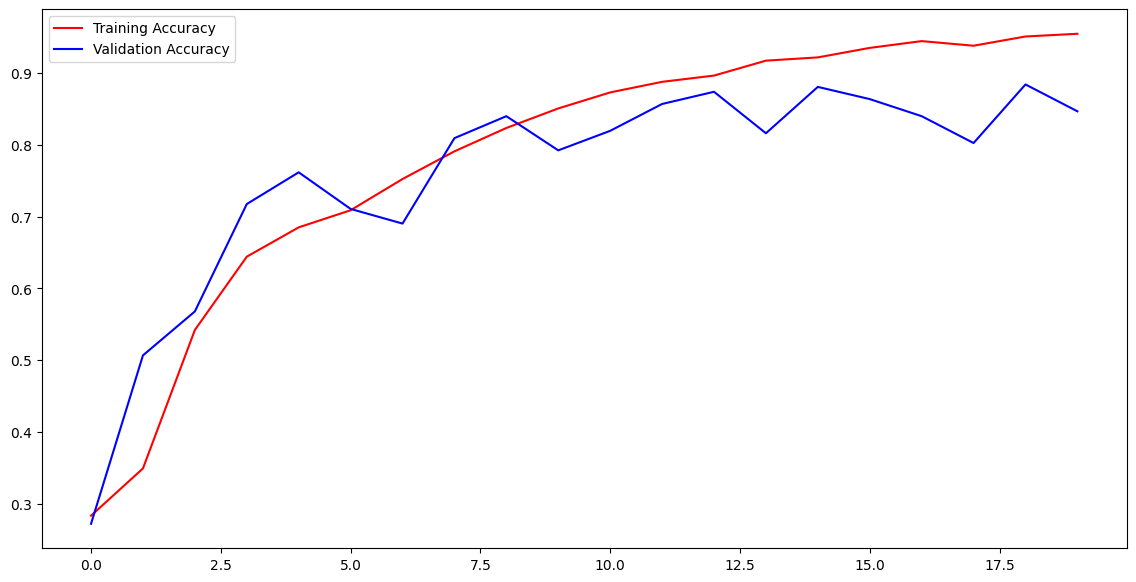

In [31]:
model.save('braintumor.h5')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

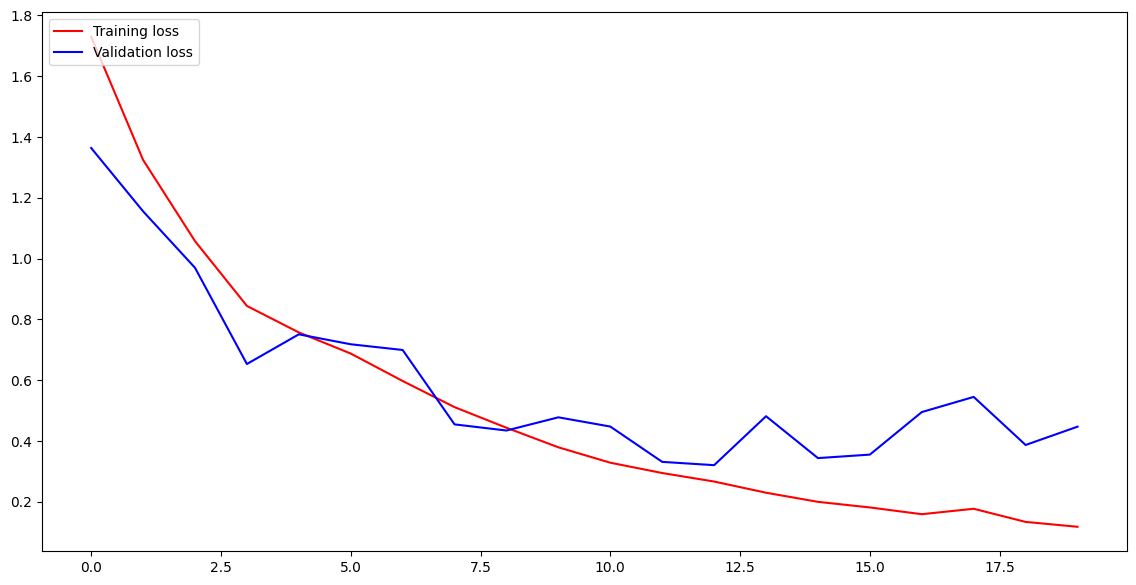

In [32]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

**Prediction**

In [33]:
img = cv2.imread('/kaggle/input/brain-tumor-detection-using-mri-images/Training/pituitary_tumor/p (107).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [34]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

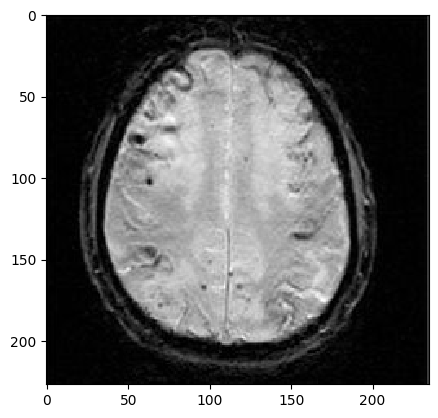

In [42]:
from tensorflow.keras.preprocessing import image

img = image.load_img('/kaggle/input/brain-tumor-detection-using-mri-images/Testing/no_tumor/image(12).jpg')
plt.imshow(img,interpolation ='nearest')
plt.show()

img = cv2.imread('/kaggle/input/brain-tumor-detection-using-mri-images/Testing/no_tumor/image(12).jpg')
img = cv2.resize(img,(150,150))

img_array = np.array(img)
img_array = img_array.reshape(1,150,150,3)

In [43]:
a=model.predict(img_array)
indices = a.argmax()
indices
print(labels[indices])

1/1 [==============================] - 0s 20ms/step
no_tumor


**Accuracy Score**

In [37]:
Y_pred=model.predict(X_test)
Y_pred

11/11 [==============================] - 0s 25ms/step


array([[5.1802999e-06, 8.9113548e-04, 3.6923328e-05, 9.9906677e-01],
       [4.3541201e-07, 8.5810839e-08, 9.9999952e-01, 3.5761810e-11],
       [9.9999487e-01, 5.0824378e-06, 4.2861231e-10, 1.3259061e-14],
       ...,
       [9.9350423e-01, 6.4958045e-03, 5.3205422e-09, 1.4441389e-09],
       [9.9951947e-01, 4.8019754e-04, 2.5343414e-07, 8.2514070e-08],
       [1.7713344e-08, 5.4103722e-08, 2.1410878e-08, 9.9999988e-01]],
      dtype=float32)

In [38]:
loss, acc = model.evaluate(x=X_test, y=Y_test)

11/11 [==============================] - 0s 12ms/step - loss: 0.5617 - accuracy: 0.8379


In [39]:
print (f"Test Loss = {loss}")
print (f"Test Accuracy = {acc}")

Test Loss = 0.5616758465766907
Test Accuracy = 0.8379204869270325


In [40]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

Y_pred_indices = np.argmax(Y_pred, axis=1)
Y_test_indices = np.argmax(Y_test, axis=1)

cm = confusion_matrix(Y_test_indices, Y_pred_indices)
print('Confusion Matrix')
print(cm)


Confusion Matrix
[[80  9  4  0]
 [30 63  1  1]
 [ 5  0 46  1]
 [ 0  2  0 85]]
